# American Universities 

This notebook will help us clean our data before exploring it. The goal of the project is to find out if the universities with the highest number of applications are the ones that get the most enrollments. The steps we'll folow are
* Load the data and get a rough idea of the content 
* Choose the columns we'll use for our analysis
* Reformat column names
* Delete rows and columns with too many NaN values
* Check for negative or invalid data
* Save the cleaned dataset 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
#Load data
os.chdir('../../Data/Original_data')
df = pd.read_csv('data.csv')
df.head()

,ID number,Name,year,ZIP code,Highest degree offered,County name,Longitude location of institution,Latitude location of institution,Religious affiliation,Offers Less than one year certificate,...,Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid,Endowment assets (year end) per FTE enrollment (GASB),Endowment assets (year end) per FTE enrollment (FASB)
0,100654,Alabama A & M University,2013,35762,Doctor's degree - research/scholarship,Madison County,-86.568502,34.783368,Not applicable,Implied no,...,81.0,81.0,7.0,1.0,32.0,89.0,89.0,1.0,NaN,NaN
1,100663,University of Alabama at Birmingham,2013,35294-0110,Doctor's degree - research/scholarship and pro...,Jefferson County,-86.809170,33.502230,Not applicable,Implied no,...,36.0,36.0,10.0,0.0,60.0,56.0,55.0,5.0,24136.0,NaN
2,100690,Amridge University,2013,36117-3553,Doctor's degree - research/scholarship and pro...,Montgomery County,-86.174010,32.362609,Churches of Christ,Implied no,...,90.0,90.0,0.0,40.0,90.0,100.0,100.0,0.0,NaN,302.0
3,100706,University of Alabama in Huntsville,2013,35899,Doctor's degree - research/scholarship and pro...,Madison County,-86.638420,34.722818,Not applicable,Yes,...,31.0,31.0,4.0,1.0,63.0,46.0,46.0,3.0,11502.0,NaN
4,100724,Alabama State University,2013,36104-0271,Doctor's degree - research/scholarship and pro...,Montgomery County,-86.295677,32.364317,Not applicable,Implied no,...,76.0,76.0,13.0,11.0,34.0,81.0,81.0,0.0,13202.0,NaN


## Choose columns for our analysis

The first step for cleaning our data is to decide what columns we need for the analysis. As we can see below there are many columns and most of them are not useful to us. We are interested to data that is related to the number of applications, enrollments and admissions. We also want to know what tpye of degrees the University offers. Data that describes graduation rates might be useful.

In [3]:
#Chose only the columns we need for our analysis
for col in df.columns:
    print(col)

ID number
Name
year
ZIP code
Highest degree offered
County name
Longitude location of institution
Latitude location of institution
Religious affiliation
Offers Less than one year certificate
Offers One but less than two years certificate
Offers Associate's degree
Offers Two but less than 4 years certificate
Offers Bachelor's degree
Offers Postbaccalaureate certificate
Offers Master's degree
Offers Post-master's certificate
Offers Doctor's degree - research/scholarship
Offers Doctor's degree - professional practice
Offers Doctor's degree - other
Offers Other degree
Applicants total
Admissions total
Enrolled total
Percent of freshmen submitting SAT scores
Percent of freshmen submitting ACT scores
SAT Critical Reading 25th percentile score
SAT Critical Reading 75th percentile score
SAT Math 25th percentile score
SAT Math 75th percentile score
SAT Writing 25th percentile score
SAT Writing 75th percentile score
ACT Composite 25th percentile score
ACT Composite 75th percentile score
Estimate

In [4]:
relative_column_data=['Name', 'year', 'Highest degree offered', 'Offers Bachelor\'s degree',
       'Offers Master\'s degree',
       'Offers Doctor\'s degree - research/scholarship',
       'Offers Doctor\'s degree - professional practice', 'Applicants total',
       'Admissions total', 'Enrolled total', 'Estimated enrollment, total',
       'Tuition and fees, 2013-14',
       'Total price for in-state students living on campus 2013-14',
       'Total price for out-of-state students living on campus 2013-14',
       'State abbreviation', 'Control of institution', 'Total  enrollment',
       'Full-time enrollment', 'Part-time enrollment',
       'Undergraduate enrollment', 'Graduate enrollment',
       'Full-time undergraduate enrollment',
       'Part-time undergraduate enrollment',
       'Percent of total enrollment that are women',
       'Percent of undergraduate enrollment that are women',
       'Percent of graduate enrollment that are women',
       'Graduation rate - Bachelor degree within 4 years, total',
       'Graduation rate - Bachelor degree within 5 years, total',
       'Graduation rate - Bachelor degree within 6 years, total',
       ]

In [5]:
#Keep only the interesting columns.
df = df[relative_column_data]

## Rename columns

Next step is to change the name of the columns to make them easier to use and get rid of special characters that might cause problems. We loop through each column name and check to if there is a special character and replace is either with and underscore or delete them.

In [6]:
#Remove spaces and special characters from column headers.
headers = df.columns.values

for i in range(len(headers)):
    for c in headers[i]:
        if c == "'":
            headers[i] = headers[i].replace(c, '')
        if c == ' ' or c == '/' or c == ',' or c == '-' or c == ':':
            headers[i] = headers[i].replace(c, '_')
        headers[i] = headers[i]

for i in range(len(headers)):
    headers[i] = headers[i].replace('___', '_')
    headers[i] = headers[i].replace('__', '_')
    headers[i] = headers[i].lower()

d = {}
for i in range(len(headers)):
    d[i] = headers[i]

df.rename(columns=d)

,name,year,highest_degree_offered,offers_bachelors_degree,offers_masters_degree,offers_doctors_degree_research_scholarship,offers_doctors_degree_professional_practice,applicants_total,admissions_total,enrolled_total,...,undergraduate_enrollment,graduate_enrollment,full_time_undergraduate_enrollment,part_time_undergraduate_enrollment,percent_of_total_enrollment_that_are_women,percent_of_undergraduate_enrollment_that_are_women,percent_of_graduate_enrollment_that_are_women,graduation_rate_bachelor_degree_within_4_years_total,graduation_rate_bachelor_degree_within_5_years_total,graduation_rate_bachelor_degree_within_6_years_total
0,Alabama A & M University,2013,Doctor's degree - research/scholarship,Yes,Yes,Yes,Implied no,6142.0,5521.0,1104.0,...,4051.0,969.0,3799.0,252.0,55.0,51.0,69.0,10.0,23.0,29.0
1,University of Alabama at Birmingham,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,5689.0,4934.0,1773.0,...,11502.0,7066.0,8357.0,3145.0,61.0,58.0,64.0,29.0,46.0,53.0
2,Amridge University,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,...,322.0,309.0,202.0,120.0,58.0,61.0,55.0,0.0,0.0,67.0
3,University of Alabama in Huntsville,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,2054.0,1656.0,651.0,...,5696.0,1680.0,4237.0,1459.0,44.0,44.0,43.0,16.0,37.0,48.0
4,Alabama State University,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,10245.0,5251.0,1479.0,...,5356.0,719.0,4872.0,484.0,61.0,59.0,71.0,9.0,19.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,University of South Florida-Sarasota-Manatee,2013,Master's degree,Yes,Yes,Implied no,Implied no,393.0,136.0,86.0,...,1728.0,149.0,837.0,891.0,60.0,59.0,65.0,NaN,NaN,NaN
1530,The Kingâ€™s College,2013,Bachelor's degree,Yes,Implied no,Implied no,Implied no,3033.0,2158.0,127.0,...,516.0,0.0,493.0,23.0,60.0,60.0,NaN,57.0,61.0,61.0
1531,Ottawa University-Online,2013,Master's degree,Yes,Yes,Implied no,Implied no,NaN,NaN,NaN,...,383.0,75.0,1.0,382.0,61.0,61.0,60.0,NaN,NaN,NaN
1532,Providence Christian College,2013,Bachelor's degree,Yes,Implied no,Implied no,Implied no,122.0,65.0,20.0,...,66.0,0.0,66.0,0.0,52.0,52.0,NaN,46.0,54.0,54.0


## Search for too many NaN values

NaN values might cause some problems when we analyze data. Especially when a large portion of a column has null values. So we calculate the percentage of NaN values for each column in the dataset. As we can see only one column has more than 15% percent NaN values. I think that it is not important to delete this column, so we'll keep it as it is.

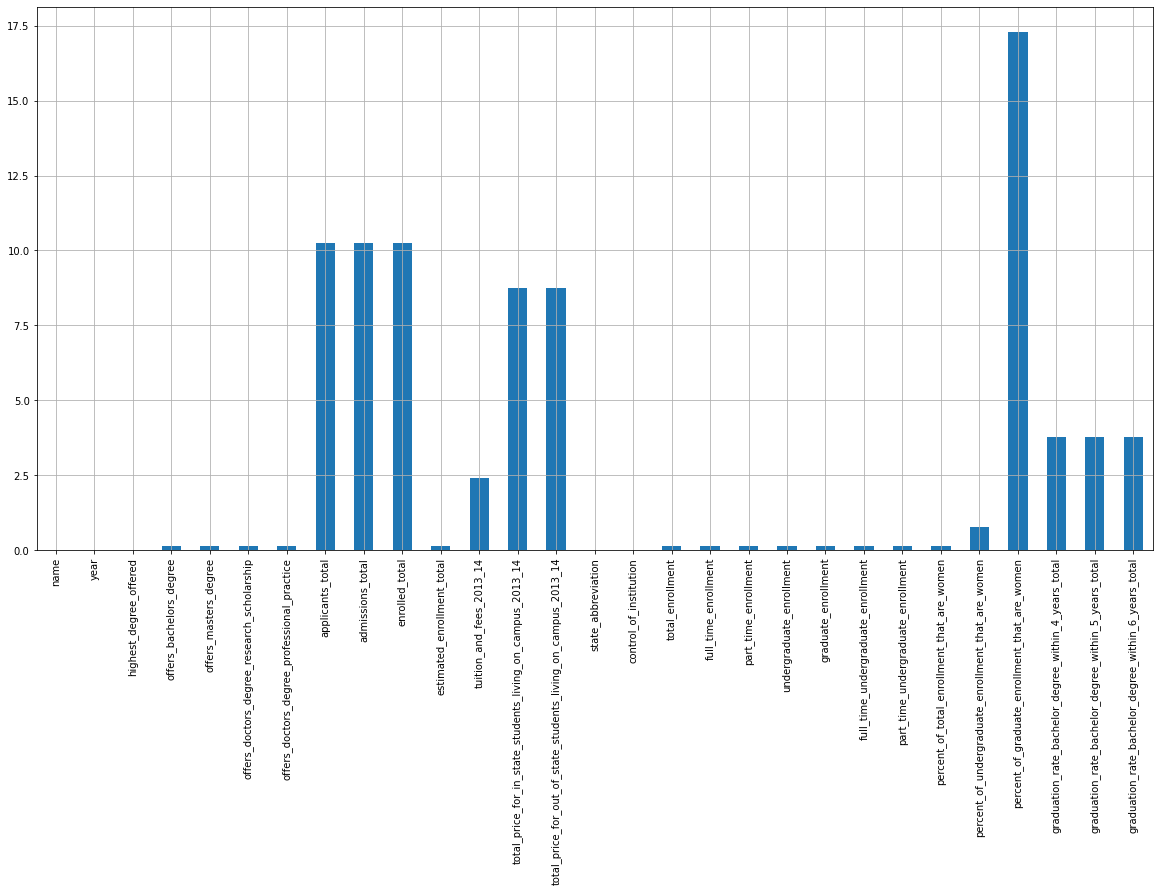

In [7]:
#Find how many null values we have in each column.
#Do not delete any of the columns.
nan_values_in_columns = df.isna().sum()
perc_of_nan_values = nan_values_in_columns / len(df) * 100

perc_of_nan_values.plot.bar(figsize = (20,10))
plt.grid(True)
plt.show()

## Delete rows with to many NaN values.

Next we delete all rows that have to many NaN values. Two rows in the dataset have 24 missing values, so we delete them.

In [8]:
#Delete rows with to many nan values.
df.isna().sum(axis=1).sort_values(ascending = False)
df.drop([257, 1308], axis = 0, inplace = True)

## Check for negative or invalid data

Having negative values for number of admissions or applications is obvioysly wrong. With this in mind if we just describe the data and check the min value for all columns with numeric data we'll see that all columns have values greated or equal to 0. That's great!

In [9]:
#Check if we have negative numeric values, they are invalid.
pd.set_option('display.max_columns', None)
df.describe()

,year,applicants_total,admissions_total,enrolled_total,estimated_enrollment_total,tuition_and_fees_2013_14,total_price_for_in_state_students_living_on_campus_2013_14,total_price_for_out_of_state_students_living_on_campus_2013_14,total_enrollment,full_time_enrollment,part_time_enrollment,undergraduate_enrollment,graduate_enrollment,full_time_undergraduate_enrollment,part_time_undergraduate_enrollment,percent_of_total_enrollment_that_are_women,percent_of_undergraduate_enrollment_that_are_women,percent_of_graduate_enrollment_that_are_women,graduation_rate_bachelor_degree_within_4_years_total,graduation_rate_bachelor_degree_within_5_years_total,graduation_rate_bachelor_degree_within_6_years_total
count,1532.0,1377.000000,1377.000000,1377.000000,1532.000000,1497.000000,1400.000000,1400.000000,1532.000000,1532.000000,1532.000000,1532.000000,1532.000000,1532.000000,1532.000000,1532.000000,1522.000000,1269.000000,1476.000000,1476.000000,1476.000000
mean,2013.0,6391.193174,3554.880174,1043.046478,7033.115535,20727.490314,34935.306429,38767.612857,7070.114230,5371.494125,1698.620104,5532.885117,1537.229112,4507.738903,1025.146214,57.911227,57.169514,63.109535,37.450542,49.788618,53.189024
std,0.0,8787.469171,4309.457606,1285.165519,9387.648898,12455.805360,13283.049319,10716.524007,9416.538854,7474.494963,2922.064160,7242.649546,2765.197979,6042.192662,2121.495422,11.784477,11.886220,14.147092,21.949856,20.256726,19.102511
min,2013.0,0.000000,0.000000,0.000000,68.000000,1032.000000,9768.000000,9768.000000,66.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2013.0,1488.000000,950.000000,287.000000,1497.250000,8542.000000,22487.000000,31128.000000,1512.750000,1199.000000,167.000000,1328.000000,46.750000,1089.500000,87.000000,52.000000,52.000000,55.000000,20.000000,36.000000,40.000000
50%,2013.0,3350.000000,2056.000000,538.000000,3126.000000,20060.000000,34115.000000,37193.500000,3127.000000,2328.000000,671.000000,2487.500000,471.000000,2066.000000,320.500000,58.000000,57.000000,64.000000,34.000000,49.000000,52.500000
75%,2013.0,7016.000000,4203.000000,1246.000000,8376.000000,29992.000000,44835.750000,45907.500000,8376.250000,6080.750000,2062.500000,6394.000000,1737.000000,5207.500000,1082.250000,63.000000,62.000000,72.000000,52.250000,63.000000,66.000000
max,2013.0,72676.000000,35815.000000,10241.000000,79576.000000,49138.000000,64988.000000,64988.000000,77338.000000,50012.000000,40985.000000,51333.000000,29874.000000,40020.000000,37440.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [10]:
#Replace all 0 values with nan values. If we replace with nan we wan't consider those values in any function.
df.replace(0, np.nan, inplace = True)

In [11]:
os.chdir('../Cleaned_data')
df.to_csv('cleaned_data.csv', index = False)